In [1]:
!python libraries.py

2024-09-04 19:38:03,100 - INFO - Upgrading pip...
2024-09-04 19:38:03,100 - INFO - Running pip command: install --upgrade pip
2024-09-04 19:38:05,333 - INFO - Command 'install --upgrade pip' executed successfully.
2024-09-04 19:38:05,333 - INFO - pip upgraded successfully.
2024-09-04 19:38:05,333 - INFO - Installing library numpy...
2024-09-04 19:38:05,333 - INFO - Running pip command: install numpy
2024-09-04 19:38:06,828 - INFO - Command 'install numpy' executed successfully.
2024-09-04 19:38:06,828 - INFO - numpy installed successfully.
2024-09-04 19:38:06,828 - INFO - Installing library pandas...
2024-09-04 19:38:06,829 - INFO - Running pip command: install pandas
2024-09-04 19:38:08,260 - INFO - Command 'install pandas' executed successfully.
2024-09-04 19:38:08,261 - INFO - pandas installed successfully.
2024-09-04 19:38:08,261 - INFO - Installing library matplotlib...
2024-09-04 19:38:08,261 - INFO - Running pip command: install matplotlib
2024-09-04 19:38:09,470 - INFO - Comman

In [2]:
import tensorflow as tf
print(f'tf.config.list_physical_devices("GPU") = {tf.config.list_physical_devices("GPU")}')

tf.config.list_physical_devices("GPU") = []


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4655904505511360343
xla_global_id: -1
]


In [4]:
import os
import numpy as np
import pandas as pd
import utils
import custom

In [5]:
metrics = []

In [6]:
ahif = custom.AHIF()

INFO:root:Initialized AHIF with process_variance=1e-05, measurement_variance=0.1, initial_estimate=0, initial_error_covariance=1


In [7]:
import dataset

data = dataset.LGHG2(data_dir='./data')
X_train, X_val, X_test, y_train, y_val, y_test = data.get_dataset()

INFO:root:./data = ['test', 'train', 'val']
INFO:root:./data\train = ['TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.csv']
INFO:root:./data\val = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv']
INFO:root:./data\test = ['04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
INFO:root:train_data_df loaded.
INFO:root:val_data_df loaded.
INFO:root:test_data_df loaded.
INFO:root:data_columns = Index(['V', 'I', 'Temp', 'V_avg', 'I_avg', 'SOC'], dtype='object')
INFO:root:features = ['V', 'I', 'Temp', 'V_avg', 'I_avg']
INFO:root:target = ['SOC']


In [8]:
train_data_df, val_data_df, test_data_df = data.get_dfs()

In [6]:
train_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.385148,0.75102,0.303101,0.385148,0.75102,0.206417
1,0.385152,0.75102,0.304591,0.385150,0.75102,0.206417
2,0.385156,0.75102,0.306081,0.385152,0.75102,0.206417
3,0.385160,0.75102,0.307572,0.385154,0.75102,0.206417
4,0.385164,0.75102,0.309062,0.385156,0.75102,0.206417
...,...,...,...,...,...,...
669951,0.478843,0.75102,0.008477,0.459558,0.75102,0.283243
669952,0.478843,0.75102,0.008477,0.459699,0.75102,0.283243
669953,0.478843,0.75102,0.008477,0.459839,0.75102,0.283243
669954,0.478961,0.75102,0.008477,0.459979,0.75102,0.283243


In [7]:
train_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

In [8]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669956 entries, 0 to 669955
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V       669956 non-null  float64
 1   I       669956 non-null  float64
 2   Temp    669956 non-null  float64
 3   V_avg   669956 non-null  float64
 4   I_avg   669956 non-null  float64
 5   SOC     669956 non-null  float64
dtypes: float64(6)
memory usage: 30.7 MB


In [9]:
val_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.967308,0.749218,0.005644,0.967308,0.749218,1.000000
1,0.957333,0.746992,0.005644,0.962321,0.748105,0.999990
2,0.953690,0.747098,0.005644,0.959444,0.747769,0.999983
3,0.952046,0.747098,0.005644,0.957594,0.747602,0.999973
4,0.951106,0.747098,0.005644,0.956297,0.747501,0.999963
...,...,...,...,...,...,...
126102,0.335128,0.751020,0.532568,0.329741,0.751020,0.194990
126103,0.335128,0.751020,0.532568,0.329778,0.751020,0.194990
126104,0.335128,0.751020,0.532568,0.329815,0.751020,0.194990
126105,0.335128,0.751020,0.532568,0.329851,0.751020,0.194990


In [10]:
val_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

In [11]:
val_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126107 entries, 0 to 126106
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V       126107 non-null  float64
 1   I       126107 non-null  float64
 2   Temp    126107 non-null  float64
 3   V_avg   126107 non-null  float64
 4   I_avg   126107 non-null  float64
 5   SOC     126107 non-null  float64
dtypes: float64(6)
memory usage: 5.8 MB


In [12]:
test_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.966960,0.748900,0.920678,0.966960,0.748900,1.000000
1,0.966020,0.746992,0.920677,0.966490,0.747946,0.999990
2,0.965901,0.746992,0.917845,0.966294,0.747628,0.999983
3,0.965783,0.747098,0.917845,0.966166,0.747496,0.999973
4,0.965665,0.746992,0.917845,0.966066,0.747395,0.999963
...,...,...,...,...,...,...
47512,0.298614,0.751020,0.926344,0.292723,0.751020,0.136623
47513,0.298614,0.751020,0.926344,0.292761,0.751020,0.136623
47514,0.298614,0.751020,0.926344,0.292798,0.751020,0.136623
47515,0.298614,0.751020,0.929177,0.292834,0.751020,0.136623


In [13]:
test_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

In [14]:
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47517 entries, 0 to 47516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       47517 non-null  float64
 1   I       47517 non-null  float64
 2   Temp    47517 non-null  float64
 3   V_avg   47517 non-null  float64
 4   I_avg   47517 non-null  float64
 5   SOC     47517 non-null  float64
dtypes: float64(6)
memory usage: 2.2 MB


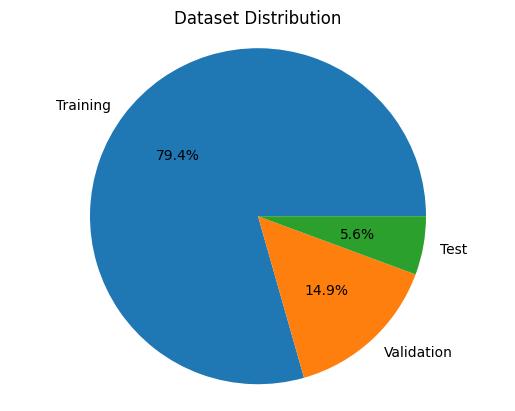

In [16]:
utils.pie_chart_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

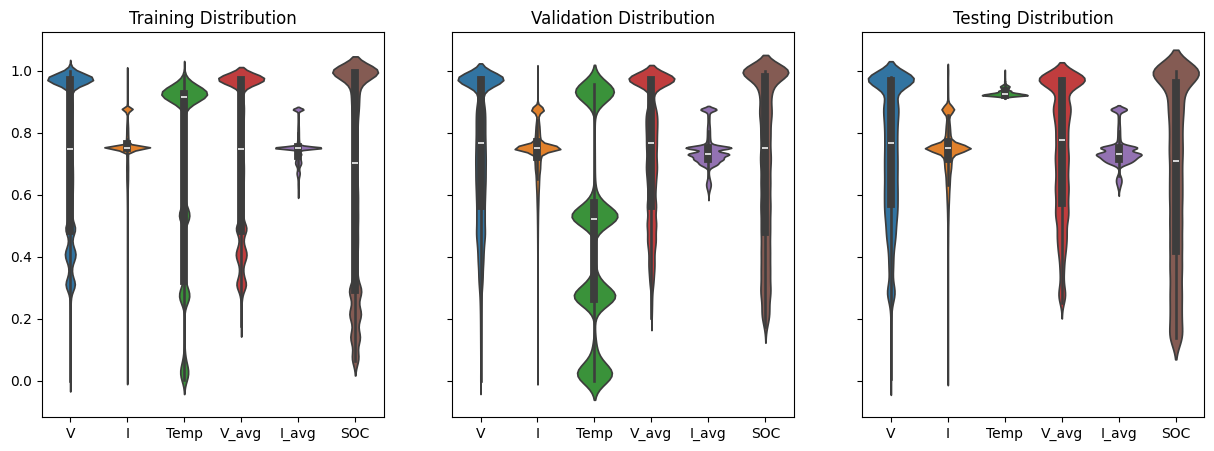

In [17]:
utils.violin_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

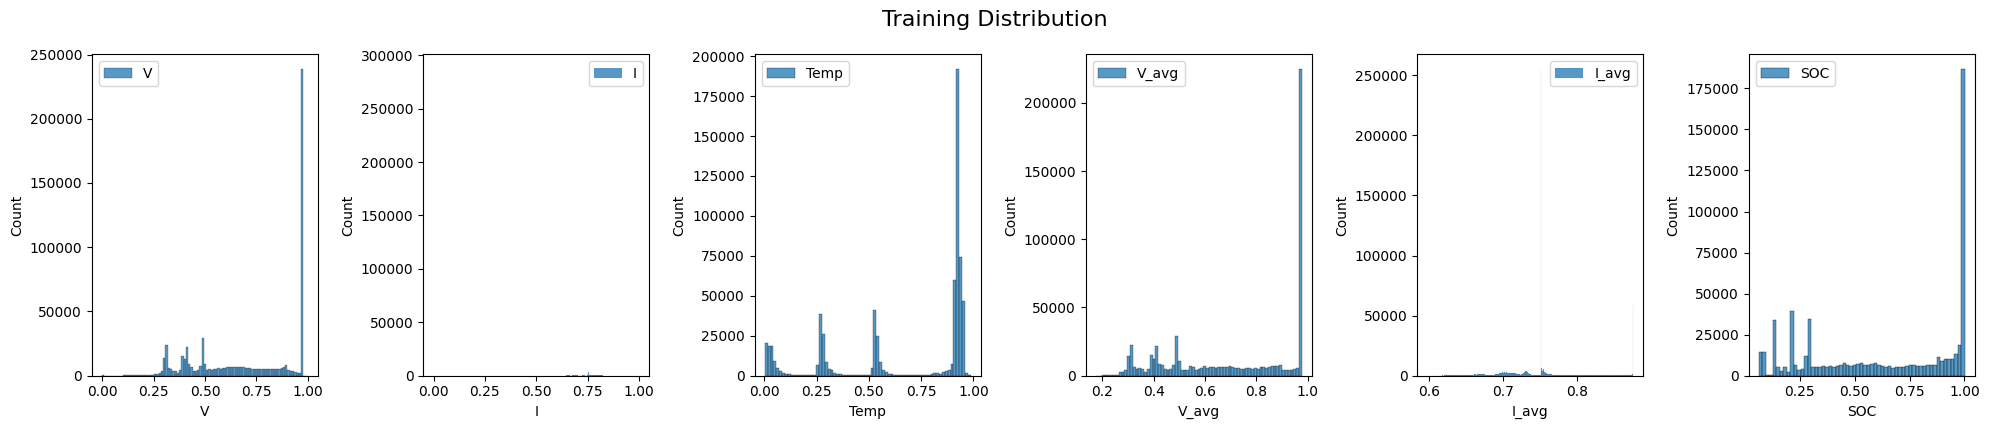

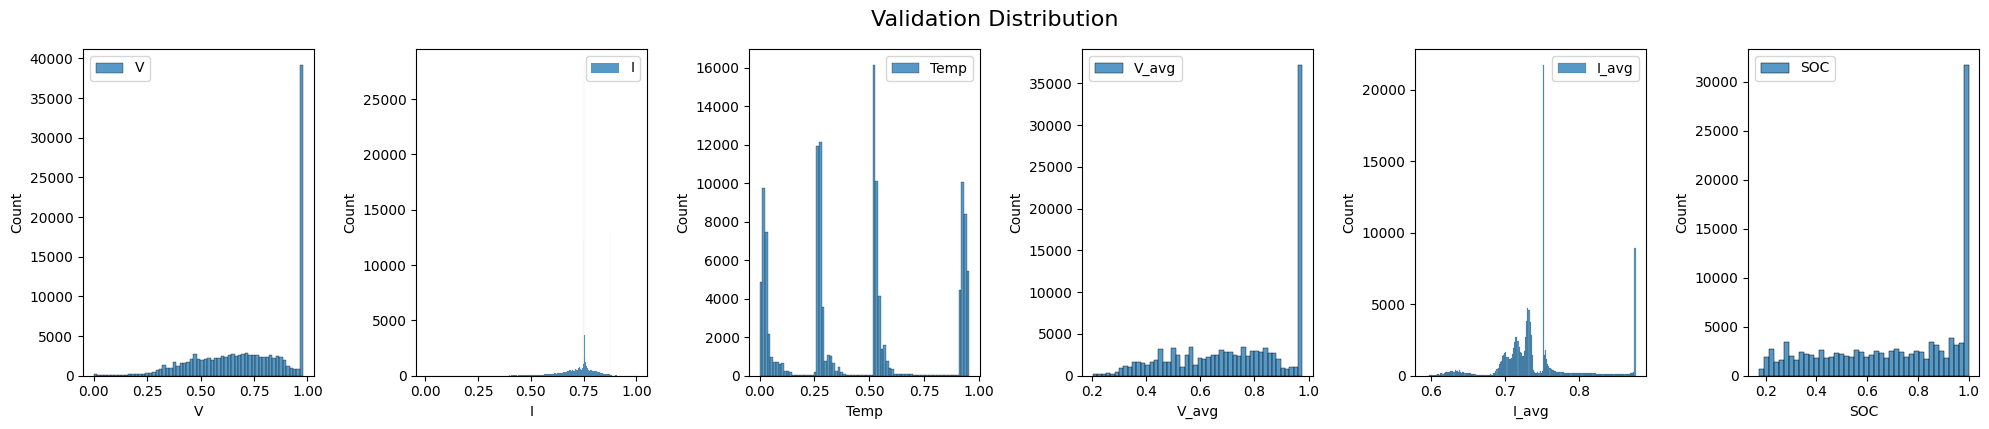

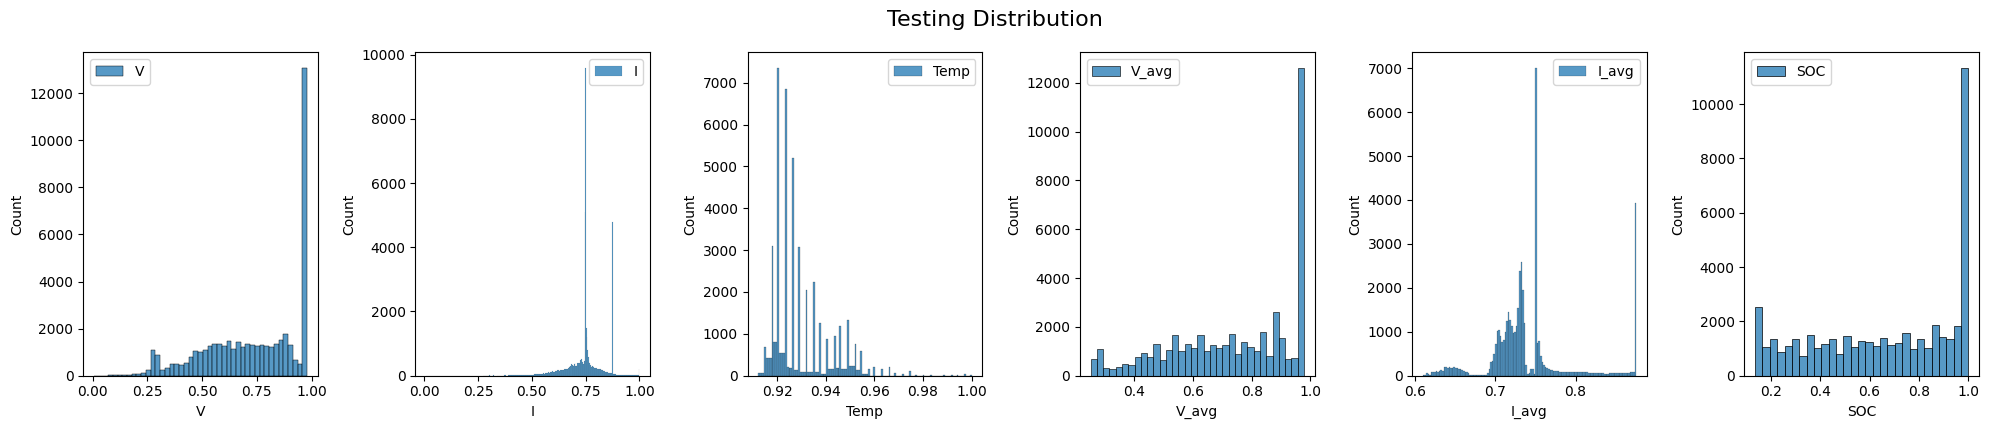

In [18]:
utils.hist_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

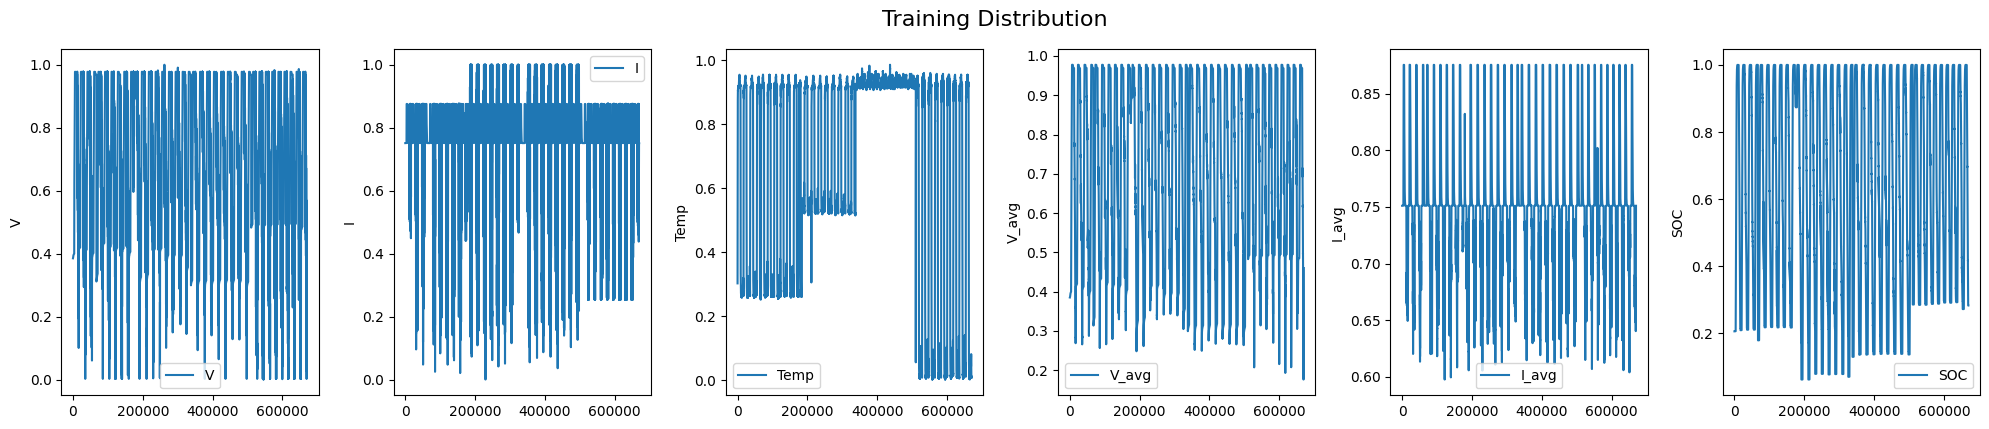

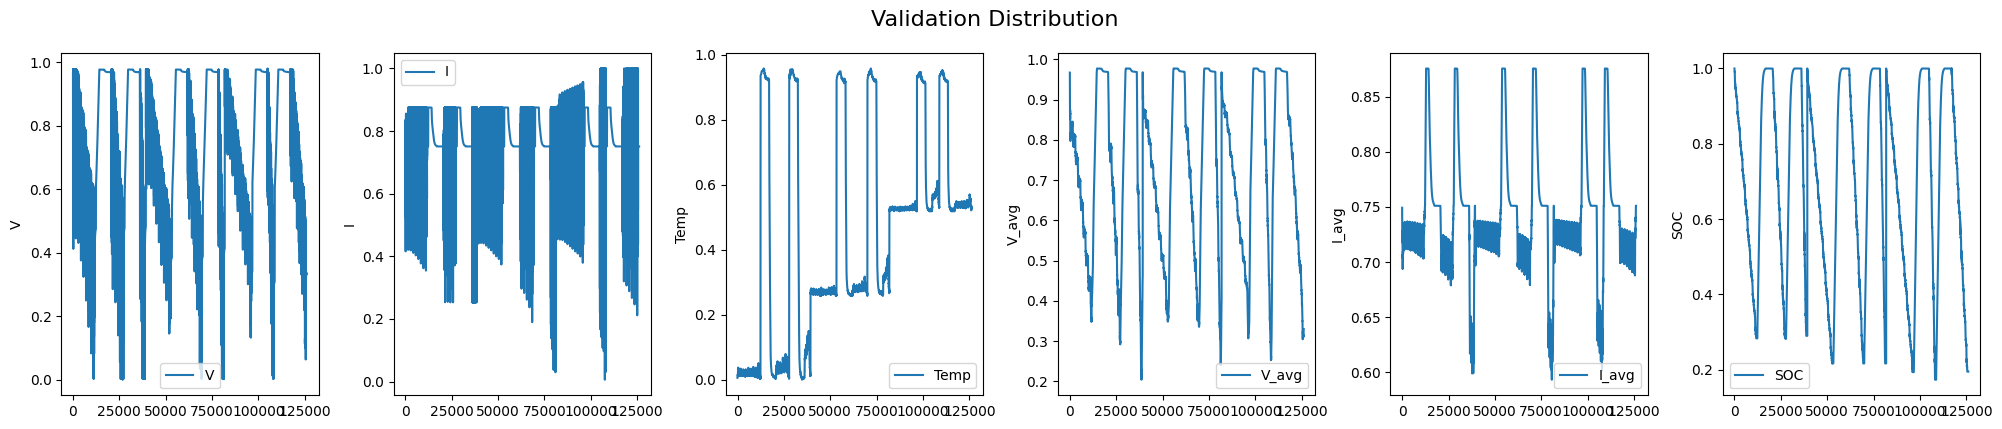

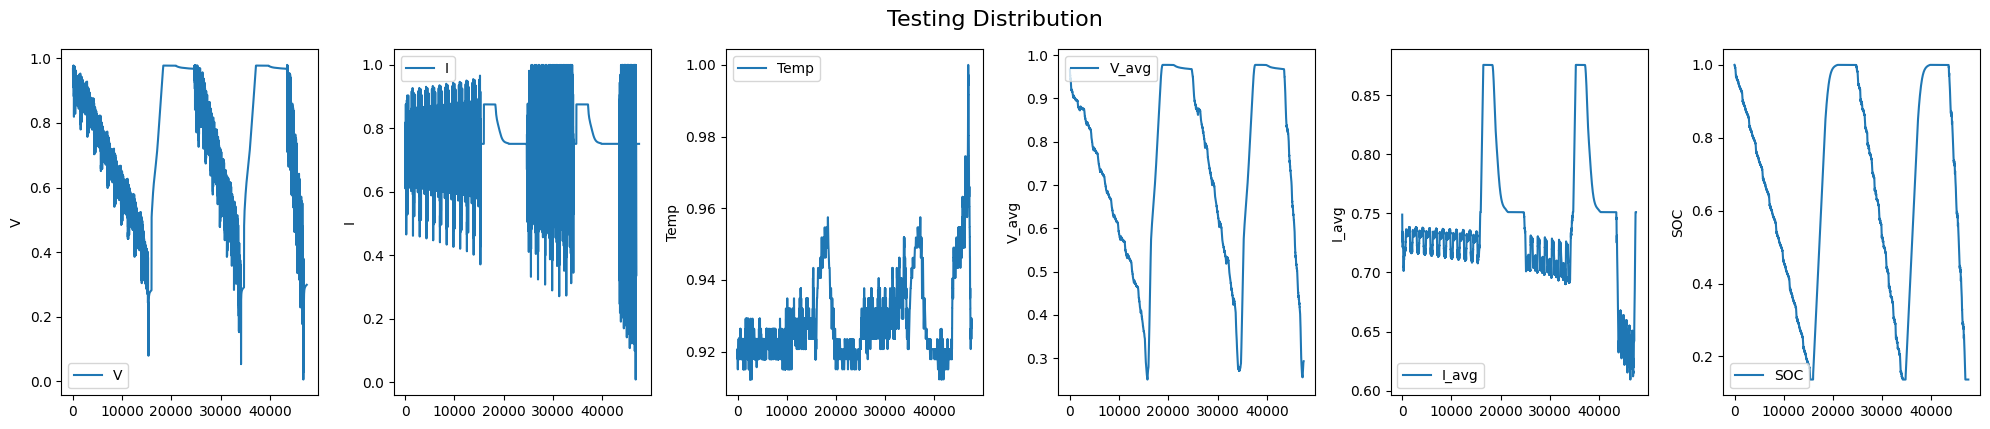

In [19]:
utils.time_series_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

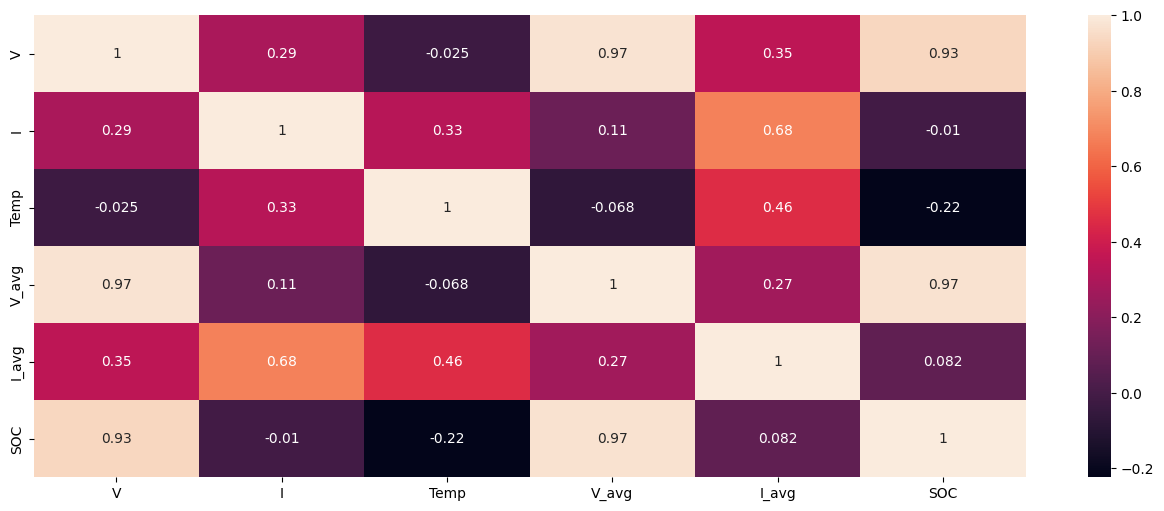

In [20]:
utils.correlation_map(data_df=train_data_df)

In [9]:
from tensorflow import keras

In [8]:
fnn = custom.FNN(
    input_shape=X_train.shape[1],
    output_shape=y_train.shape[1]
)
fnn.build()
fnn.compile()

INFO:root:FNNModel instance created with input shape 5 and output shape 1.
INFO:root:Building the model...
INFO:root:Model built successfully.
INFO:root:Compiling the model...
INFO:root:Model compiled successfully.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,353 (392.00 KB)

 Trainable params: 100,353 (392.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10
)

In [10]:
history = fnn.get_model().fit(
    x=X_train,
    y=y_train,
    epochs=100,
    batch_size=64,
    validation_data=(
        X_val, 
        y_val
    ),
    callbacks = [
        early_stopping
    ],
    verbose=1,
)

Epoch 1/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0076 - val_loss: 0.0038
Epoch 2/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0027 - val_loss: 0.0033
Epoch 3/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 4/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 5/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 6/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 7/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 8/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 9/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 10/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0019 - val_loss: 0.0027
Epoch 11/100
10469/10469 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 0.0019 - val

In [11]:
fnn_model_name = 'fnn_model.keras'
models_dir = './models'
fnn_model_path = os.path.join(models_dir, fnn_model_name)

fnn.get_model().save(filepath=fnn_model_path)

In [12]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,val_loss,epoch
36,0.001807,0.002600,36
37,0.001807,0.002604,37
38,0.001807,0.002597,38
39,0.001806,0.002607,39
40,0.001806,0.002607,40


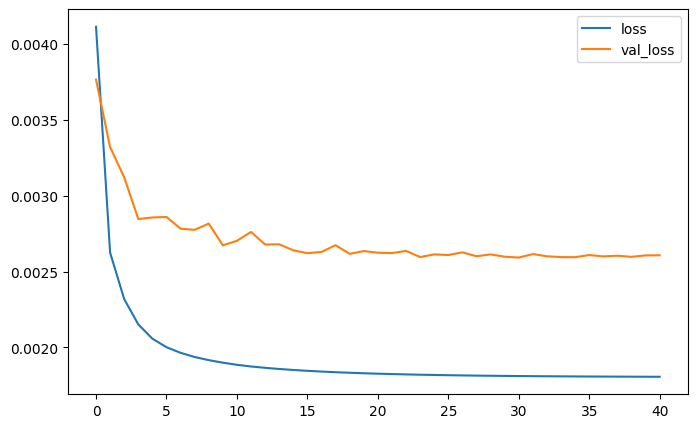

In [13]:
from matplotlib import pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show() 

In [10]:
fnn_model_name = 'fnn_model.keras'
models_dir = './models'
fnn_model_path = os.path.join(models_dir, fnn_model_name)

fnn_model = keras.models.load_model(
    filepath=fnn_model_path, 
    custom_objects={
        'CustomLeakyReLU': custom.CustomLeakyReLU,
        'CustomClippedReLU': custom.CustomClippedReLU
    }
)

In [11]:
y_predicted = ahif.apply(
    data=fnn_model.predict(X_test)
)

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [12]:
result = fnn_model.evaluate(X_test, y_test)

1485/1485 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 8.1109e-04


In [13]:
fnn_metrics = utils.get_metrics(y_test, y_predicted)
metrics.append(fnn_metrics[0])
fnn_metrics[1]

,Metric,Value
0,max_error,0.182498
1,mean_absolute_error,0.020446
2,mean_absolute_percentage_error,0.055259
3,mean_squared_error,0.000937
4,root_mean_squared_error,0.030611
5,root_mean_squared_log_error,0.021943


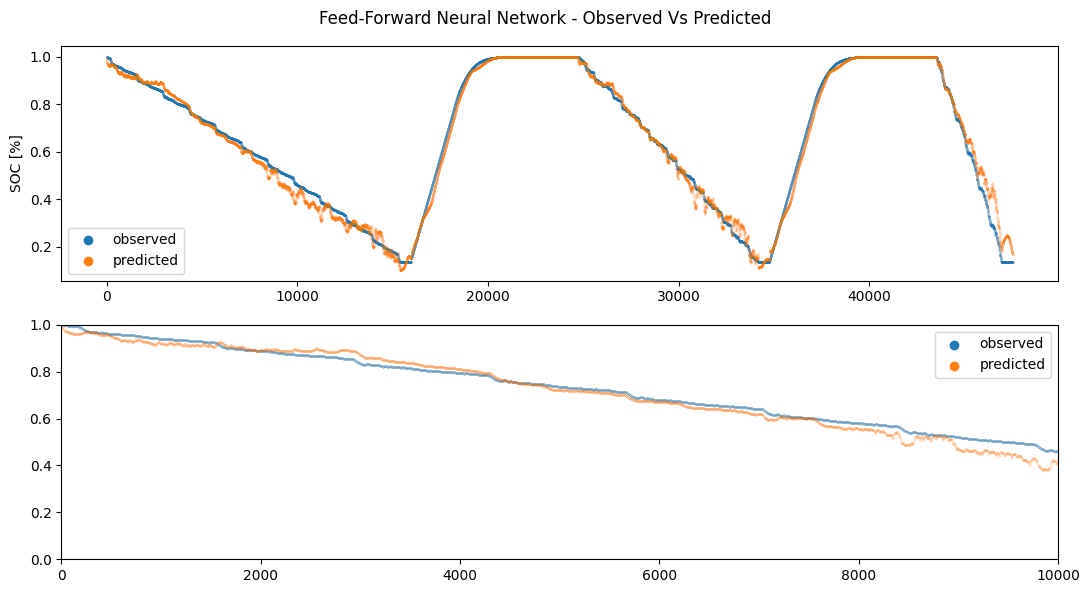

In [19]:
utils.results_plot(
    x_observed=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    x_predicted=np.arange(0, len(y_predicted), 1), 
    y_predicted=y_predicted,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='', 
    ylabel='SOC [%]', 
    title='Feed-Forward Neural Network - Observed Vs Predicted'
)

In [11]:
import shap

In [12]:
X_test_sampled = shap.sample(X_test, 100)
explainer = shap.KernelExplainer(fnn_model.predict, X_test_sampled)
shap_values = explainer.shap_values(X_test_sampled)
shap_values = np.squeeze(shap_values)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
INFO:shap:num_full_subsets = 2
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
INFO:shap:phi = array([ 0.08815733,  0.04029656,  0.0026937 , -0.08347745,  0.09228188])
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
INFO:shap:num_full_subsets = 2
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
INFO:shap:phi = array([-0.02333852,  0.06441332,  0.0018691 , -0.08396406,  0.05336757])
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
INFO:shap:num_full_subsets = 2
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
INFO:shap:phi = array([-0.15348303, -0.09459287, -0.00219353, -0.09266132, -0.14393826])
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
INFO:shap:num_full_subsets = 2
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
INFO:shap:phi = array([-0.13181864, -0.01674975,  0.00069491, -0.05713653, -0.08282998])
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
INFO:shap:num_full_subsets = 2
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
INFO:shap:phi = array([ 0.09510508, -0.01122086,  0.00394166, -0.03591639, -0.06810531])
1/1 ━━━━━━━

In [ ]:
shap.initjs()

In [47]:
features = list(test_data_df.columns)
target = [features.pop(-1)]
print(f'features = {features}')
print(f'target = {target}')

features = ['V', 'I', 'Temp', 'V_avg', 'I_avg']
target = ['SOC']


In [44]:
shap_values[0]

array([ 0.08815733,  0.04029656,  0.0026937 , -0.08347745,  0.09228188])

In the waterfall above, the x-axis has the values of the target (dependent) variable which is the SOC. x is the chosen observation, f(x) is the predicted value of the model, given input x and E[f(x)] is the expected value of the target variable, or in other words, the mean of all predictions (mean(model.predict(X))).\
The SHAP value for each feature in this observation is given by the length of the bar. Above, I_avg has a SHAP value of +0.09, V_avg has a SHAP of -0.08 and so on. The sum of all SHAP values will be equal to E[f(x)] — f(x).\
The absolute SHAP value shows us how much a single feature affected the prediction, so I_avg contributed the most, V the second one, V_avg the third, I the fourth and Temp was the feature with the lowest contribution to the prediction.

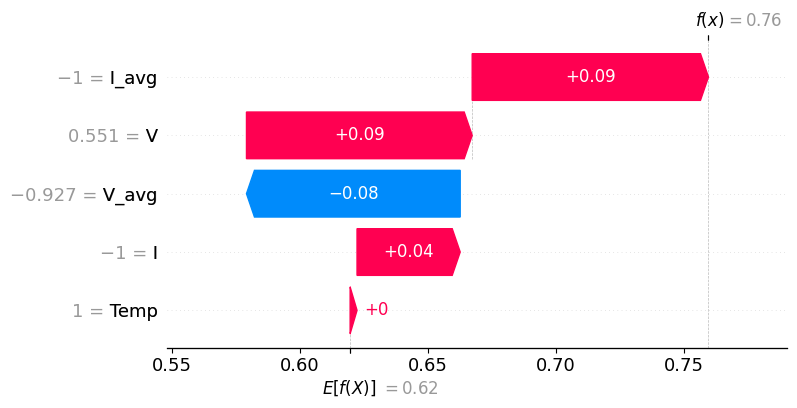

In [48]:
x = 0
shap_explanation = shap.Explanation(
    values=shap_values[x],
    base_values=explainer.expected_value,
    data=X_test_sampled[x],
    feature_names=features
)
shap.plots.waterfall(shap_explanation)

Note that these SHAP values are valid for this observation only. With other data points the SHAP values will change. In order to understand the importance or contribution of the features for the whole dataset, another plot can be used, the bee swarm plot or use summary_plot.\
For example, high values of the I_avg variable have a high negative contribution on the prediction, while low values have a high positive contribution. The feature Temp has almost no contribution to the prediction, whether its values are high or low.
All variables are shown in the order of global feature importance, the first one being the most important and the last being the least important one.

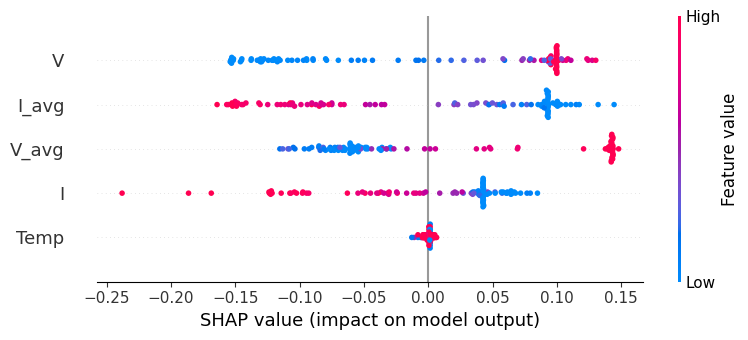

In [52]:
shap.summary_plot(shap_values, X_test_sampled, feature_names=features)

In [14]:
import pickle

In [21]:
from sklearn import linear_model
lregression_model = linear_model.LinearRegression()
lregression_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [22]:
lregression_model_name = 'lregression_model.sav'
models_dir = './models'
lregression_model_path = os.path.join(models_dir, lregression_model_name)

pickle.dump(lregression_model, open(lregression_model_path, 'wb'))

In [15]:
lregression_model_name = 'lregression_model.sav'
models_dir = './models'
lregression_model_path = os.path.join(models_dir, lregression_model_name)

lregression_model = pickle.load(open(lregression_model_path, 'rb'))

In [16]:
y_predicted = ahif.apply(
    data=lregression_model.predict(X_test)
)

In [17]:
result = lregression_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 86.04%


In [18]:
lregression_metrics = utils.get_metrics(y_test, y_predicted)
metrics.append(lregression_metrics[0])
lregression_metrics[1]

,Metric,Value
0,max_error,0.824711
1,mean_absolute_error,0.087788
2,mean_absolute_percentage_error,0.192673
3,mean_squared_error,0.012042
4,root_mean_squared_error,0.109735
5,root_mean_squared_log_error,0.073840


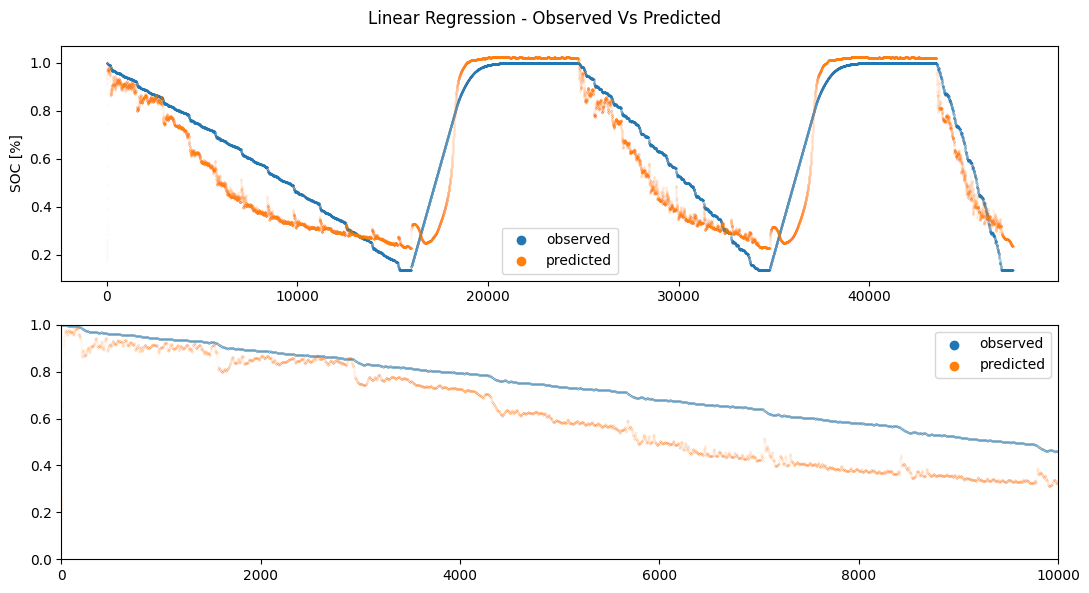

In [27]:
utils.results_plot(
    x_observed=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    x_predicted=np.arange(0, len(y_predicted), 1), 
    y_predicted=y_predicted,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='', 
    ylabel='SOC [%]', 
    title='Linear Regression - Observed Vs Predicted'
)

In [28]:
from sklearn import tree
decisiontree_model = tree.DecisionTreeRegressor()
decisiontree_model.fit(
    X=X_train, 
    y=y_train
)

DecisionTreeRegressor()

In [29]:
decisiontree_model_name = 'decisiontree_model.sav'
models_dir = './models'
decisiontree_model_path = os.path.join(models_dir, decisiontree_model_name)

pickle.dump(decisiontree_model, open(decisiontree_model_path, 'wb'))

In [19]:
decisiontree_model_name = 'decisiontree_model.sav'
models_dir = './models'
decisiontree_model_path = os.path.join(models_dir, decisiontree_model_name)

decisiontree_model = pickle.load(open(decisiontree_model_path, 'rb'))

In [20]:
y_predicted = ahif.apply(
    data=decisiontree_model.predict(X_test)
)

In [21]:
result = decisiontree_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 97.95%


In [22]:
decisiontree_metrics = utils.get_metrics(y_test, y_predicted)
metrics.append(decisiontree_metrics[0])
decisiontree_metrics[1]

,Metric,Value
0,max_error,0.758014
1,mean_absolute_error,0.019896
2,mean_absolute_percentage_error,0.055139
3,mean_squared_error,0.001205
4,root_mean_squared_error,0.034718
5,root_mean_squared_log_error,0.024904


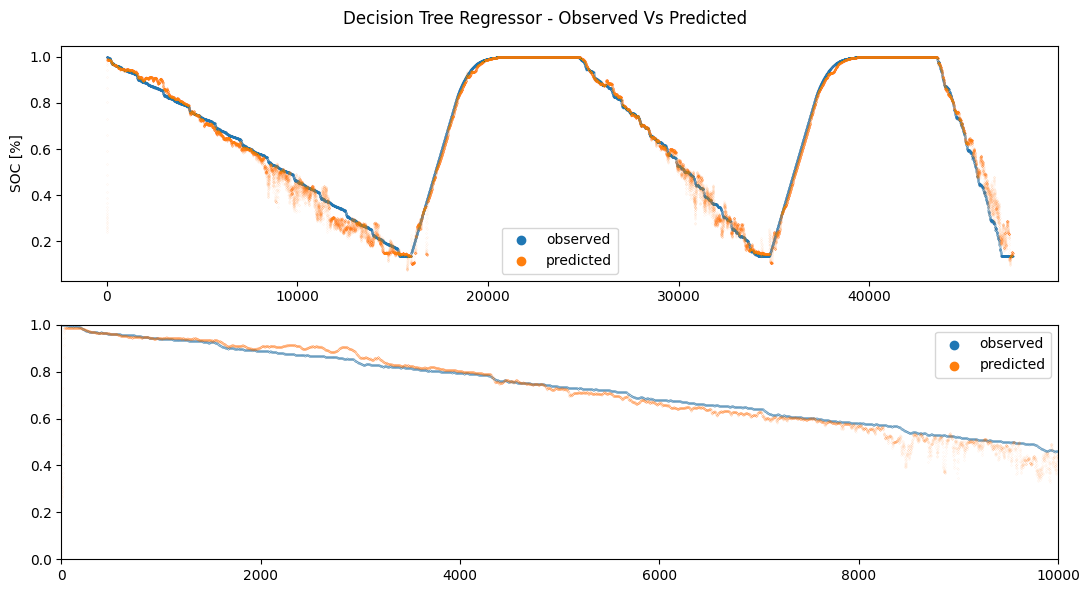

In [34]:
utils.results_plot(
    x_observed=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    x_predicted=np.arange(0, len(y_predicted), 1), 
    y_predicted=y_predicted,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='', 
    ylabel='SOC [%]', 
    title='Decision Tree Regressor - Observed Vs Predicted'
)

In [35]:
from sklearn import neighbors
nnregression_model = neighbors.KNeighborsRegressor(n_neighbors=5)
nnregression_model.fit(
    X=X_train, 
    y=y_train
)

KNeighborsRegressor()

In [36]:
nnregression_model_name = 'nnregression_model.sav'
models_dir = './models'
nnregression_model_path = os.path.join(models_dir, nnregression_model_name)

pickle.dump(nnregression_model, open(nnregression_model_path, 'wb'))

In [23]:
nnregression_model_name = 'nnregression_model.sav'
models_dir = './models'
nnregression_model_path = os.path.join(models_dir, nnregression_model_name)

nnregression_model = pickle.load(open(nnregression_model_path, 'rb'))

In [24]:
y_predicted = ahif.apply(
    data=nnregression_model.predict(X_test)
)

In [25]:
result = nnregression_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 98.78%


In [26]:
nnregression_metrics = utils.get_metrics(y_test, y_predicted)
metrics.append(nnregression_metrics[0])
nnregression_metrics[1]

,Metric,Value
0,max_error,0.829363
1,mean_absolute_error,0.018244
2,mean_absolute_percentage_error,0.049310
3,mean_squared_error,0.000945
4,root_mean_squared_error,0.030747
5,root_mean_squared_log_error,0.021820


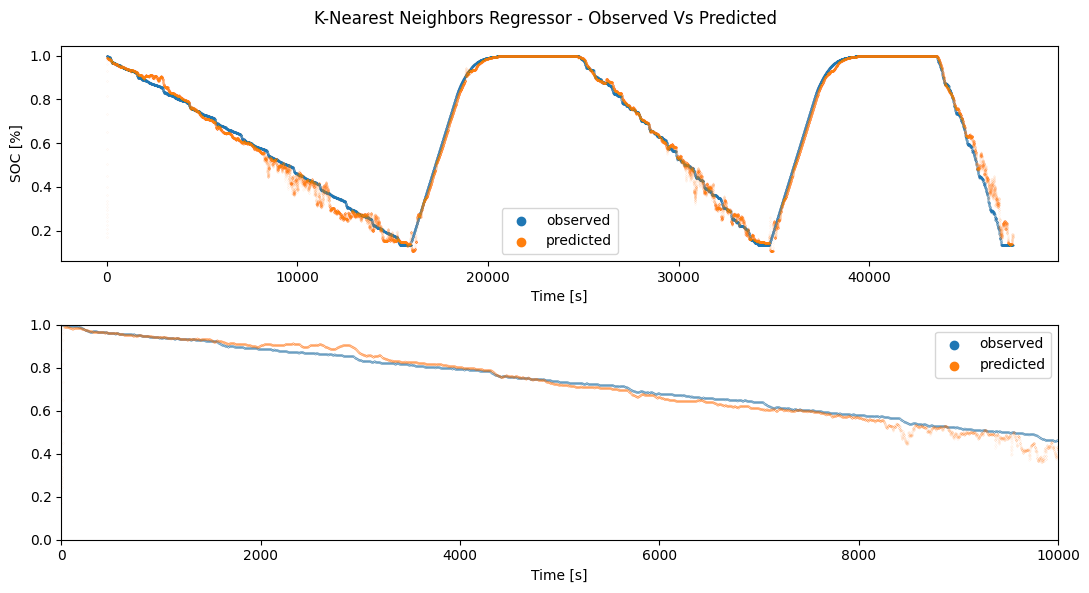

In [41]:
utils.results_plot(
    x_observed=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    x_predicted=np.arange(0, len(y_predicted), 1), 
    y_predicted=y_predicted,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='Time [s]', 
    ylabel='SOC [%]', 
    title='K-Nearest Neighbors Regressor - Observed Vs Predicted'
)

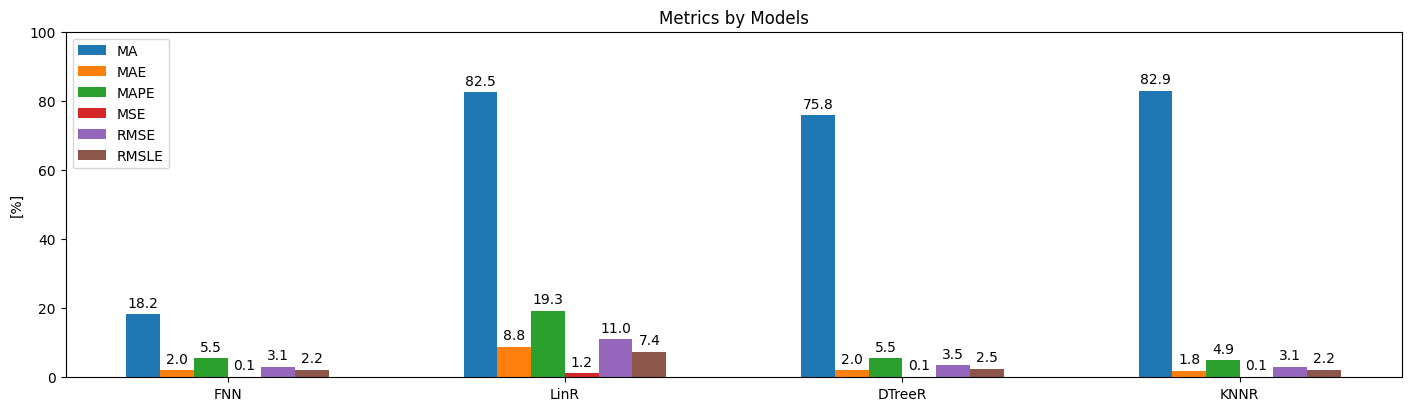

In [27]:
utils.metrics_plot(
    models_names=['FNN', 'LinR', 'DTreeR', 'KNNR'],
    metrics_names=['MA', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSLE'],
    metrics_values=metrics
)